In [76]:
#import sys
import numpy as np
import pandas as pd
#np.set_printoptions(threshold=sys.maxsize)#생략된 모든 array 데이터들도 보기위한 함수
np.set_printoptions(threshold=3)  #다시 기본값 돌리기
import matplotlib.pyplot as plt
from sklearn import svm, datasets #Support Vector Machine(SVM)을 사용 가능하게 만들어주는 모듈
%matplotlib inline

In [57]:
iris = datasets.load_iris()
print(iris.keys())# dataset의 키값
print(iris.data.shape)# dataset의 크기
print(iris.feature_names)# dataset의 특징(컬럼)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [58]:
print(iris.DESCR)# 전반적인 dataset의 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [59]:
x = iris.data[:,:2] #2개의 열의 전체 데이터 저장
y = iris.target # class데이터 저장
SVM = svm.SVC(kernel = 'linear', C=1).fit(x, y) 
#SVM모델을 만드는 함수(차원의 세분화 - rbf(radial basis function), linear, poly(polynomial) 사용)
#C : 값을 낮추면 초평면이 매끄러워짐 , 높이면 서포트 벡터들을 더 잘분류
#gamma : 값을 낮추면 초평면에서 멀리 떨어진 서포트 벡터들의 영향이 낮고 값을 높이면 멀리 떨어진 요소들의 값이 영향이 커짐(초평면에 인접한 벡터마저 영향을 크게 받기에 울퉁불퉁해짐)


In [70]:
#데이터 시각화 전처리(그래프를 위한)
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1  #plot의 처음과 끝 값을 지정해주기 위한 변수 (그래프의 가로) (1씩 더하고 빼서 더 보기좋게 만듬)
y_min, y_max = x[:,1].min()-1, x[:,1].max()+1  #plot의 처음과 끝 값을 지정해주기 위한 변수 (그래프의 세로) (1씩 더하고 빼서 더 보기좋게 만듬)

plot_unit = 0.025 #축의 단위를 설정해주는 변수 (조그마한 1칸 당)

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit))
# 최소값과 최대값 사이 단위만큼의 값들을 나열하여 사이에 넣음
print(xx)
print(yy)

[[3.3   3.325 3.35  ... 8.825 8.85  8.875]
 [3.3   3.325 3.35  ... 8.825 8.85  8.875]
 [3.3   3.325 3.35  ... 8.825 8.85  8.875]
 ...
 [3.3   3.325 3.35  ... 8.825 8.85  8.875]
 [3.3   3.325 3.35  ... 8.825 8.85  8.875]
 [3.3   3.325 3.35  ... 8.825 8.85  8.875]]
[[1.    1.    1.    ... 1.    1.    1.   ]
 [1.025 1.025 1.025 ... 1.025 1.025 1.025]
 [1.05  1.05  1.05  ... 1.05  1.05  1.05 ]
 ...
 [5.325 5.325 5.325 ... 5.325 5.325 5.325]
 [5.35  5.35  5.35  ... 5.35  5.35  5.35 ]
 [5.375 5.375 5.375 ... 5.375 5.375 5.375]]


[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


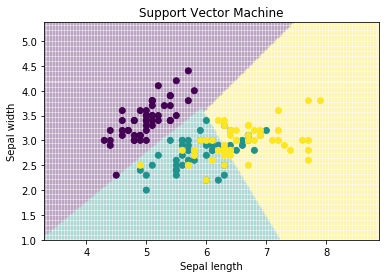

정확도 :  0.82


In [77]:
z = SVM.predict(np.c_[xx.ravel(),yy.ravel()])
#np.ravel() : 행렬의 1행부터 순차적으로 값을 불러옴
#즉 xx가 가로 yy가 세로 일 때 특징1인 xx와 특징2인 yy를 각각 0.025 범위별로 매칭시켜 
#target값인 y값을 예측함(보라색,하늘색,노랑색). 그예측값을 z에 저장
#np.c_[] : 1차원 배열을 세로로 두고 두 세로 배열을 옆으로 붙임  https://rfriend.tistory.com/352
#print(np.c_[xx.ravel(),yy.ravel()])

#print(z)
z = z.reshape(xx.shape) #각각 예측된 값들을 xx 의 크기대로 다시 reshape함 
#print(z)
plt.pcolormesh(xx,yy,z,alpha=0.1) #3가지 배열을 가지고 heatmap을 만들어주는 함수
plt.scatter(x[:,0],x[:,1],c=y) # x값에 대한 산점도와 그 x에 대한 y값에 대한 색상을 달리함
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X=x,y=y)) #예측된 값과 실제 값과 비교하여 정확도를 비교

C:\Users\SH\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


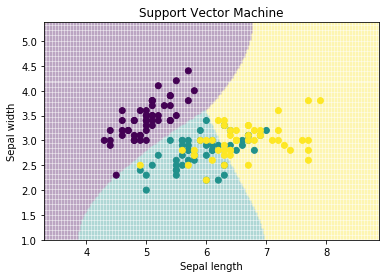

정확도 :  0.8266666666666667


In [78]:
SVM=svm.SVC(kernel='rbf', C=1).fit(x,y) # 커널 rbf로 변경
z = SVM.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
z = z.reshape(xx.shape)

plt.pcolormesh(xx,yy,z,alpha=0.1)
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X=x,y=y))

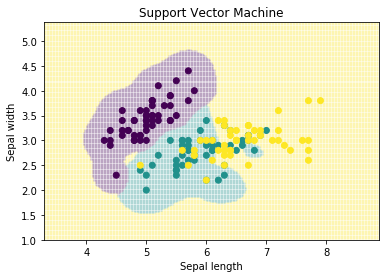

정확도 :  0.84


In [79]:
SVM=svm.SVC(kernel='rbf', C=1 ,gamma=10).fit(x,y) #gamma 조정
z = SVM.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
z = z.reshape(xx.shape) 
plt.pcolormesh(xx,yy,z,alpha=0.1) 
plt.scatter(x[:,0],x[:,1],c=y) 
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X=x,y=y)) 

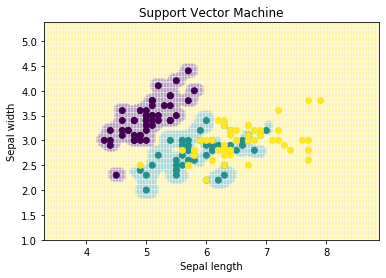

정확도 :  0.92


In [80]:
SVM=svm.SVC(kernel='rbf', C=1 ,gamma=100).fit(x,y) #gamma 조정
z = SVM.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
z = z.reshape(xx.shape) 
plt.pcolormesh(xx,yy,z,alpha=0.1) 
plt.scatter(x[:,0],x[:,1],c=y) 
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X=x,y=y)) 

C:\Users\SH\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


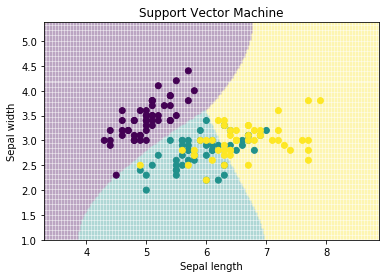

정확도 :  0.8266666666666667


In [83]:
SVM=svm.SVC(kernel='rbf', C=1).fit(x,y) #gamma 자동
z = SVM.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
z = z.reshape(xx.shape) 
plt.pcolormesh(xx,yy,z,alpha=0.1) 
plt.scatter(x[:,0],x[:,1],c=y) 
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X=x,y=y)) 

C:\Users\SH\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


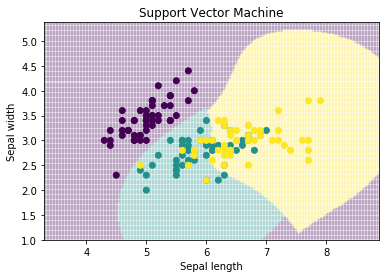

정확도 :  0.82


In [84]:
SVM=svm.SVC(kernel='rbf', C=100).fit(x,y) # C값 조정 
z = SVM.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
z = z.reshape(xx.shape) 
plt.pcolormesh(xx,yy,z,alpha=0.1) 
plt.scatter(x[:,0],x[:,1],c=y) 
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X=x,y=y)) 

C:\Users\SH\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


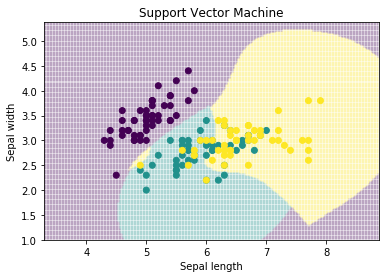

정확도 :  0.8133333333333334


In [85]:
SVM=svm.SVC(kernel='rbf', C=1000).fit(x,y) #gamma 자동
z = SVM.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
z = z.reshape(xx.shape) 
plt.pcolormesh(xx,yy,z,alpha=0.1) 
plt.scatter(x[:,0],x[:,1],c=y) 
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('Support Vector Machine')
plt.show()
print('정확도 : ',SVM.score(X=x,y=y)) 

In [ ]:
#결론 
#C : 값을 낮추면 초평면이 매끄러워짐 , 높이면 서포트 벡터들을 더 잘 분류하도록 초평면이 굽어짐
#gamma : 값을 낮추면 초평면에서 멀리 떨어진 서포트 벡터들의 영향이 낮고 
#       값을 높이면 멀리 떨어진 요소들의 값이 영향이 커짐(초평면에 인접한 벡터마저 영향을 크게 받기에 세밀하게 울퉁불퉁해짐)
